In [31]:
# blog @ https://medium.com/towards-data-science/learn-word2vec-by-implementing-it-in-tensorflow-45641adaf2ac
# only 3 layers NN
import tensorflow as tf
import numpy as np

In [32]:
corpus_raw = 'He is the king . The king is royal . She is the royal  queen '
corpus_raw = corpus_raw.lower()

# dictionary translates words to integers, vice versa
words = []

for word in corpus_raw.split():
    if word != '.':  # avoiding '.' as word
        words.append(word)
words = set(words)  # avoiding duplicates
word2int = {}
int2word = {}
vocab_size = len(words)

print(words)
for i, word in enumerate(words):
    word2int[word] = i
    int2word[i] = word


{'king', 'the', 'is', 'queen', 'he', 'royal', 'she'}


In [33]:
# raw sentences is a list of sentences.
raw_sentences = corpus_raw.split('.')
sentences = []
for sentence in raw_sentences:
    sentences.append(sentence.split())

# word2vec - refer : http://mccormickml.com/2016/04/19/word2vec-tutorial-the-skip-gram-model/
# window size = 2
# 
# source text										    training samples
# The quick brown fox jumps over the lazy dog			    (the, quick)
# ---------------       									(the, brown)
# 
# The quick brown fox jumps over the lazy dog			    (quick, the)
# -------------------        								(quick, brown)
# 												            (quick, fox)
# 
# The quick brown fox jumps over the lazy dog			    (brown, the)
# -------------------------         						(brown, quick)
# 												            (brown, fox)
# 												            (brown, jumps)
# 
# 
# The quick brown fox jumps over the lazy dog			    (fox, quick)
# 	  --------------------------        					(fox, brown)
# 												            (fox, jumps)
# 												            (fox, over)
# Note: If the word is at the beginning or ending of sentence, the window ignores the outer words.

data = []
WINDOW_SIZE = 2
# this is brilliant
for sentence in sentences:
    for word_index, word in enumerate(sentence):
        for nb_word in sentence[max(word_index - WINDOW_SIZE, 0): min(word_index + WINDOW_SIZE, len(sentence)) + 1]:
            if nb_word != word:
                data.append([word, nb_word])

# training data ==> data

In [34]:
# function to convert numbers to one hot vectors
def to_one_hot_vector(data_point_index, vocab_size):
    temp = np.zeros(vocab_size)
    temp[data_point_index] = 1
    return temp


x_train = []  # input word
y_train = []  # output word

for data_word in data:
    x_train.append(to_one_hot_vector(word2int[data_word[0]], vocab_size))
    y_train.append(to_one_hot_vector(word2int[data_word[1]], vocab_size))

# convert them to numpy arrays
x_train = np.asarray(x_train)
y_train = np.asarray(y_train)

In [35]:
learning_rate = .01
epochs = 10000

# making placeholders for x_train and y_train
X = tf.placeholder(tf.float32, shape=[None, vocab_size])
Y = tf.placeholder(tf.float32, shape=[None, vocab_size])

# we take our training data and convert into the embedded representation.
EMBEDDING_DIM = 5  # you can choose your own number
W1 = tf.Variable(tf.random_normal([vocab_size, EMBEDDING_DIM]))
b1 = tf.Variable(tf.random_normal([EMBEDDING_DIM]))  #bias
hidden_representation = tf.add(tf.matmul(X, W1), b1)

# Next, we take what we have in the embedded dimension and make a prediction about the neighbour. 
# To make the prediction we use softmax.
W2 = tf.Variable(tf.random_normal([EMBEDDING_DIM, vocab_size]))
b2 = tf.Variable(tf.random_normal([vocab_size]))
prediction = tf.nn.softmax(tf.add(tf.matmul(hidden_representation, W2), b2))

# define the loss function:
# Hy′(y):=−∑iy′ilog(yi)
cross_entropy_loss = tf.reduce_mean(-tf.reduce_sum(Y * tf.log(prediction), reduction_indices=[1]))

# train step
train_step = tf.train.GradientDescentOptimizer(learning_rate).minimize(cross_entropy_loss)
init_var = tf.global_variables_initializer()


In [36]:
# train block
with tf.Session() as sess:
    sess.run(init_var)
    for _ in range(epochs):
        sess.run(train_step, feed_dict={X: x_train, Y: y_train})
        """It eventually stabilises on a constant loss. Even though we can’t get high accuracy, 
        we don’t care. All we are interested in is W1 and b1, i.e., the hidden representations."""
        print('loss is : ', sess.run(cross_entropy_loss, feed_dict={X: x_train, Y: y_train}))
    # print('W1 :: ', sess.run(W1))
    # print('b1 :: ', sess.run(b1))
    """When we multiply the one hot vectors with W1 , 
    we basically get access to the row of the of W1 
    which is in fact the embedded representation of the word represented by the input one hot vector. 
    So W1 is essentially acting as a look up table."""

    vectors = sess.run(W1 + b1)
    # if you work it out, you will see that it has the same effect as running the node hidden representation
    # print(vectors)
    # If we want the representation for ‘queen’, all we have to do is:
    # print(vectors[word2int['queen']])
    # [-0.1771524  -1.58012688  1.69621992  1.2537359  -1.51709461]

loss is :  4.49313
loss is :  4.46285
loss is :  4.43316
loss is :  4.40402
loss is :  4.37542
loss is :  4.34735
loss is :  4.3198
loss is :  4.29276
loss is :  4.2662
loss is :  4.24012
loss is :  4.21451
loss is :  4.18936
loss is :  4.16465
loss is :  4.14039
loss is :  4.11655
loss is :  4.09313
loss is :  4.07011
loss is :  4.0475
loss is :  4.02528
loss is :  4.00345
loss is :  3.98199
loss is :  3.96089
loss is :  3.94015
loss is :  3.91976
loss is :  3.89972
loss is :  3.88001
loss is :  3.86062
loss is :  3.84155
loss is :  3.82279
loss is :  3.80434
loss is :  3.78618
loss is :  3.76831
loss is :  3.75072
loss is :  3.7334
loss is :  3.71635
loss is :  3.69955
loss is :  3.68302
loss is :  3.66672
loss is :  3.65067
loss is :  3.63485
loss is :  3.61926
loss is :  3.60389
loss is :  3.58874
loss is :  3.57379
loss is :  3.55905
loss is :  3.54452
loss is :  3.53017
loss is :  3.51601
loss is :  3.50204
loss is :  3.48825
loss is :  3.47464
loss is :  3.46119
loss is :  3.447

2.87115
loss is :  2.86401
loss is :  2.85693
loss is :  2.84993
loss is :  2.84299
loss is :  2.83613
loss is :  2.82932
loss is :  2.82259
loss is :  2.81592
loss is :  2.80932
loss is :  2.80278
loss is :  2.79631
loss is :  2.7899
loss is :  2.78355
loss is :  2.77726
loss is :  2.77104
loss is :  2.76487
loss is :  2.75877
loss is :  2.75273
loss is :  2.74674
loss is :  2.74081
loss is :  2.73494
loss is :  2.72913
loss is :  2.72337
loss is :  2.71767
loss is :  2.71202
loss is :  2.70643
loss is :  2.70089
loss is :  2.6954
loss is :  2.68996
loss is :  2.68458
loss is :  2.67925
loss is :  2.67397
loss is :  2.66873
loss is :  2.66355
loss is :  2.65842
loss is :  2.65333
loss is :  2.64829
loss is :  2.64329
loss is :  2.63835
loss is :  2.63344
loss is :  2.62859
loss is :  2.62377
loss is :  2.619
loss is :  2.61428
loss is :  2.60959
loss is :  2.60495
loss is :  2.60035
loss is :  2.59579
loss is :  2.59127
loss is :  2.58679
loss is :  2.58235
loss is :  2.57795
loss is 

loss is :  2.13711
loss is :  2.13549
loss is :  2.13387
loss is :  2.13227
loss is :  2.13067
loss is :  2.12907
loss is :  2.12749
loss is :  2.12591
loss is :  2.12433
loss is :  2.12276
loss is :  2.1212
loss is :  2.11964
loss is :  2.11809
loss is :  2.11655
loss is :  2.11501
loss is :  2.11348
loss is :  2.11196
loss is :  2.11044
loss is :  2.10892
loss is :  2.10741
loss is :  2.10591
loss is :  2.10441
loss is :  2.10292
loss is :  2.10144
loss is :  2.09996
loss is :  2.09849
loss is :  2.09702
loss is :  2.09555
loss is :  2.0941
loss is :  2.09265
loss is :  2.0912
loss is :  2.08976
loss is :  2.08832
loss is :  2.08689
loss is :  2.08547
loss is :  2.08405
loss is :  2.08263
loss is :  2.08122
loss is :  2.07982
loss is :  2.07842
loss is :  2.07703
loss is :  2.07564
loss is :  2.07425
loss is :  2.07288
loss is :  2.0715
loss is :  2.07013
loss is :  2.06877
loss is :  2.06741
loss is :  2.06605
loss is :  2.06471
loss is :  2.06336
loss is :  2.06202
loss is :  2.060

loss is :  1.88755
loss is :  1.88672
loss is :  1.8859
loss is :  1.88508
loss is :  1.88427
loss is :  1.88345
loss is :  1.88264
loss is :  1.88183
loss is :  1.88102
loss is :  1.88021
loss is :  1.8794
loss is :  1.8786
loss is :  1.8778
loss is :  1.877
loss is :  1.8762
loss is :  1.8754
loss is :  1.87461
loss is :  1.87382
loss is :  1.87303
loss is :  1.87224
loss is :  1.87145
loss is :  1.87066
loss is :  1.86988
loss is :  1.8691
loss is :  1.86832
loss is :  1.86754
loss is :  1.86677
loss is :  1.86599
loss is :  1.86522
loss is :  1.86445
loss is :  1.86368
loss is :  1.86292
loss is :  1.86215
loss is :  1.86139
loss is :  1.86062
loss is :  1.85986
loss is :  1.85911
loss is :  1.85835
loss is :  1.8576
loss is :  1.85684
loss is :  1.85609
loss is :  1.85534
loss is :  1.85459
loss is :  1.85385
loss is :  1.8531
loss is :  1.85236
loss is :  1.85162
loss is :  1.85088
loss is :  1.85014
loss is :  1.84941
loss is :  1.84867
loss is :  1.84794
loss is :  1.84721
loss

1.74885
loss is :  1.74832
loss is :  1.74779
loss is :  1.74726
loss is :  1.74673
loss is :  1.7462
loss is :  1.74568
loss is :  1.74515
loss is :  1.74463
loss is :  1.7441
loss is :  1.74358
loss is :  1.74306
loss is :  1.74254
loss is :  1.74202
loss is :  1.7415
loss is :  1.74098
loss is :  1.74046
loss is :  1.73994
loss is :  1.73943
loss is :  1.73891
loss is :  1.7384
loss is :  1.73789
loss is :  1.73738
loss is :  1.73686
loss is :  1.73635
loss is :  1.73585
loss is :  1.73534
loss is :  1.73483
loss is :  1.73432
loss is :  1.73382
loss is :  1.73331
loss is :  1.73281
loss is :  1.73231
loss is :  1.7318
loss is :  1.7313
loss is :  1.7308
loss is :  1.7303
loss is :  1.7298
loss is :  1.72931
loss is :  1.72881
loss is :  1.72831
loss is :  1.72782
loss is :  1.72732
loss is :  1.72683
loss is :  1.72634
loss is :  1.72585
loss is :  1.72536
loss is :  1.72487
loss is :  1.72438
loss is :  1.72389
loss is :  1.7234
loss is :  1.72292
loss is :  1.72243
loss is :  1.7

loss is :  1.66176
loss is :  1.66138
loss is :  1.66099
loss is :  1.66061
loss is :  1.66022
loss is :  1.65984
loss is :  1.65946
loss is :  1.65907
loss is :  1.65869
loss is :  1.65831
loss is :  1.65793
loss is :  1.65755
loss is :  1.65717
loss is :  1.65679
loss is :  1.65641
loss is :  1.65603
loss is :  1.65565
loss is :  1.65528
loss is :  1.6549
loss is :  1.65452
loss is :  1.65415
loss is :  1.65377
loss is :  1.6534
loss is :  1.65303
loss is :  1.65265
loss is :  1.65228
loss is :  1.65191
loss is :  1.65154
loss is :  1.65117
loss is :  1.6508
loss is :  1.65043
loss is :  1.65006
loss is :  1.64969
loss is :  1.64932
loss is :  1.64895
loss is :  1.64859
loss is :  1.64822
loss is :  1.64785
loss is :  1.64749
loss is :  1.64712
loss is :  1.64676
loss is :  1.6464
loss is :  1.64603
loss is :  1.64567
loss is :  1.64531
loss is :  1.64495
loss is :  1.64459
loss is :  1.64423
loss is :  1.64387
loss is :  1.64351
loss is :  1.64315
loss is :  1.64279
loss is :  1.642

 1.58833
loss is :  1.58805
loss is :  1.58778
loss is :  1.5875
loss is :  1.58723
loss is :  1.58695
loss is :  1.58668
loss is :  1.58641
loss is :  1.58614
loss is :  1.58587
loss is :  1.58559
loss is :  1.58532
loss is :  1.58505
loss is :  1.58478
loss is :  1.58451
loss is :  1.58424
loss is :  1.58397
loss is :  1.58371
loss is :  1.58344
loss is :  1.58317
loss is :  1.5829
loss is :  1.58264
loss is :  1.58237
loss is :  1.58211
loss is :  1.58184
loss is :  1.58157
loss is :  1.58131
loss is :  1.58105
loss is :  1.58078
loss is :  1.58052
loss is :  1.58026
loss is :  1.57999
loss is :  1.57973
loss is :  1.57947
loss is :  1.57921
loss is :  1.57895
loss is :  1.57869
loss is :  1.57843
loss is :  1.57817
loss is :  1.57791
loss is :  1.57765
loss is :  1.57739
loss is :  1.57713
loss is :  1.57687
loss is :  1.57662
loss is :  1.57636
loss is :  1.5761
loss is :  1.57585
loss is :  1.57559
loss is :  1.57534
loss is :  1.57508
loss is :  1.57483
loss is :  1.57457
loss i

loss is :  1.53145
loss is :  1.53126
loss is :  1.53108
loss is :  1.5309
loss is :  1.53072
loss is :  1.53054
loss is :  1.53036
loss is :  1.53018
loss is :  1.53
loss is :  1.52982
loss is :  1.52964
loss is :  1.52946
loss is :  1.52928
loss is :  1.5291
loss is :  1.52892
loss is :  1.52874
loss is :  1.52857
loss is :  1.52839
loss is :  1.52821
loss is :  1.52803
loss is :  1.52786
loss is :  1.52768
loss is :  1.52751
loss is :  1.52733
loss is :  1.52716
loss is :  1.52698
loss is :  1.52681
loss is :  1.52663
loss is :  1.52646
loss is :  1.52628
loss is :  1.52611
loss is :  1.52594
loss is :  1.52576
loss is :  1.52559
loss is :  1.52542
loss is :  1.52525
loss is :  1.52507
loss is :  1.5249
loss is :  1.52473
loss is :  1.52456
loss is :  1.52439
loss is :  1.52422
loss is :  1.52405
loss is :  1.52388
loss is :  1.52371
loss is :  1.52354
loss is :  1.52337
loss is :  1.5232
loss is :  1.52304
loss is :  1.52287
loss is :  1.5227
loss is :  1.52253
loss is :  1.52237
l

 1.49417
loss is :  1.49405
loss is :  1.49393
loss is :  1.49381
loss is :  1.49369
loss is :  1.49357
loss is :  1.49345
loss is :  1.49333
loss is :  1.49321
loss is :  1.49309
loss is :  1.49297
loss is :  1.49285
loss is :  1.49273
loss is :  1.49261
loss is :  1.49249
loss is :  1.49237
loss is :  1.49225
loss is :  1.49213
loss is :  1.49201
loss is :  1.4919
loss is :  1.49178
loss is :  1.49166
loss is :  1.49154
loss is :  1.49143
loss is :  1.49131
loss is :  1.49119
loss is :  1.49108
loss is :  1.49096
loss is :  1.49084
loss is :  1.49073
loss is :  1.49061
loss is :  1.49049
loss is :  1.49038
loss is :  1.49026
loss is :  1.49015
loss is :  1.49003
loss is :  1.48992
loss is :  1.4898
loss is :  1.48969
loss is :  1.48957
loss is :  1.48946
loss is :  1.48934
loss is :  1.48923
loss is :  1.48911
loss is :  1.489
loss is :  1.48889
loss is :  1.48877
loss is :  1.48866
loss is :  1.48854
loss is :  1.48843
loss is :  1.48832
loss is :  1.48821
loss is :  1.48809
loss is

loss is :  1.47146
loss is :  1.47137
loss is :  1.47128
loss is :  1.47119
loss is :  1.4711
loss is :  1.47101
loss is :  1.47092
loss is :  1.47083
loss is :  1.47073
loss is :  1.47064
loss is :  1.47055
loss is :  1.47046
loss is :  1.47037
loss is :  1.47028
loss is :  1.47019
loss is :  1.4701
loss is :  1.47001
loss is :  1.46992
loss is :  1.46983
loss is :  1.46974
loss is :  1.46965
loss is :  1.46956
loss is :  1.46947
loss is :  1.46938
loss is :  1.46929
loss is :  1.46921
loss is :  1.46912
loss is :  1.46903
loss is :  1.46894
loss is :  1.46885
loss is :  1.46876
loss is :  1.46867
loss is :  1.46858
loss is :  1.4685
loss is :  1.46841
loss is :  1.46832
loss is :  1.46823
loss is :  1.46814
loss is :  1.46806
loss is :  1.46797
loss is :  1.46788
loss is :  1.46779
loss is :  1.4677
loss is :  1.46762
loss is :  1.46753
loss is :  1.46744
loss is :  1.46736
loss is :  1.46727
loss is :  1.46718
loss is :  1.46709
loss is :  1.46701
loss is :  1.46692
loss is :  1.466

 1.45419
loss is :  1.45412
loss is :  1.45404
loss is :  1.45397
loss is :  1.45389
loss is :  1.45382
loss is :  1.45375
loss is :  1.45367
loss is :  1.4536
loss is :  1.45353
loss is :  1.45345
loss is :  1.45338
loss is :  1.45331
loss is :  1.45323
loss is :  1.45316
loss is :  1.45309
loss is :  1.45301
loss is :  1.45294
loss is :  1.45287
loss is :  1.45279
loss is :  1.45272
loss is :  1.45265
loss is :  1.45257
loss is :  1.4525
loss is :  1.45243
loss is :  1.45236
loss is :  1.45228
loss is :  1.45221
loss is :  1.45214
loss is :  1.45207
loss is :  1.45199
loss is :  1.45192
loss is :  1.45185
loss is :  1.45178
loss is :  1.45171
loss is :  1.45163
loss is :  1.45156
loss is :  1.45149
loss is :  1.45142
loss is :  1.45135
loss is :  1.45128
loss is :  1.4512
loss is :  1.45113
loss is :  1.45106
loss is :  1.45099
loss is :  1.45092
loss is :  1.45085
loss is :  1.45078
loss is :  1.4507
loss is :  1.45063
loss is :  1.45056
loss is :  1.45049
loss is :  1.45042
loss is

loss is :  1.44074
loss is :  1.44067
loss is :  1.44061
loss is :  1.44055
loss is :  1.44048
loss is :  1.44042
loss is :  1.44036
loss is :  1.4403
loss is :  1.44023
loss is :  1.44017
loss is :  1.44011
loss is :  1.44005
loss is :  1.43998
loss is :  1.43992
loss is :  1.43986
loss is :  1.4398
loss is :  1.43973
loss is :  1.43967
loss is :  1.43961
loss is :  1.43955
loss is :  1.43948
loss is :  1.43942
loss is :  1.43936
loss is :  1.4393
loss is :  1.43924
loss is :  1.43917
loss is :  1.43911
loss is :  1.43905
loss is :  1.43899
loss is :  1.43893
loss is :  1.43887
loss is :  1.4388
loss is :  1.43874
loss is :  1.43868
loss is :  1.43862
loss is :  1.43856
loss is :  1.4385
loss is :  1.43844
loss is :  1.43837
loss is :  1.43831
loss is :  1.43825
loss is :  1.43819
loss is :  1.43813
loss is :  1.43807
loss is :  1.43801
loss is :  1.43795
loss is :  1.43789
loss is :  1.43782
loss is :  1.43776
loss is :  1.4377
loss is :  1.43764
loss is :  1.43758
loss is :  1.43752

loss is :  1.42961
loss is :  1.42955
loss is :  1.4295
loss is :  1.42944
loss is :  1.42939
loss is :  1.42933
loss is :  1.42928
loss is :  1.42922
loss is :  1.42917
loss is :  1.42911
loss is :  1.42906
loss is :  1.42901
loss is :  1.42895
loss is :  1.4289
loss is :  1.42884
loss is :  1.42879
loss is :  1.42873
loss is :  1.42868
loss is :  1.42862
loss is :  1.42857
loss is :  1.42851
loss is :  1.42846
loss is :  1.42841
loss is :  1.42835
loss is :  1.4283
loss is :  1.42824
loss is :  1.42819
loss is :  1.42814
loss is :  1.42808
loss is :  1.42803
loss is :  1.42797
loss is :  1.42792
loss is :  1.42787
loss is :  1.42781
loss is :  1.42776
loss is :  1.4277
loss is :  1.42765
loss is :  1.4276
loss is :  1.42754
loss is :  1.42749
loss is :  1.42744
loss is :  1.42738
loss is :  1.42733
loss is :  1.42727
loss is :  1.42722
loss is :  1.42717
loss is :  1.42711
loss is :  1.42706
loss is :  1.42701
loss is :  1.42695
loss is :  1.4269
loss is :  1.42685
loss is :  1.4268


loss is :  1.4211
loss is :  1.42105
loss is :  1.421
loss is :  1.42095
loss is :  1.4209
loss is :  1.42085
loss is :  1.4208
loss is :  1.42075
loss is :  1.4207
loss is :  1.42066
loss is :  1.42061
loss is :  1.42056
loss is :  1.42051
loss is :  1.42046
loss is :  1.42041
loss is :  1.42036
loss is :  1.42031
loss is :  1.42026
loss is :  1.42021
loss is :  1.42016
loss is :  1.42012
loss is :  1.42007
loss is :  1.42002
loss is :  1.41997
loss is :  1.41992
loss is :  1.41987
loss is :  1.41982
loss is :  1.41977
loss is :  1.41973
loss is :  1.41968
loss is :  1.41963
loss is :  1.41958
loss is :  1.41953
loss is :  1.41948
loss is :  1.41943
loss is :  1.41939
loss is :  1.41934
loss is :  1.41929
loss is :  1.41924
loss is :  1.41919
loss is :  1.41914
loss is :  1.4191
loss is :  1.41905
loss is :  1.419
loss is :  1.41895
loss is :  1.4189
loss is :  1.41885
loss is :  1.41881
loss is :  1.41876
loss is :  1.41871
loss is :  1.41866
loss is :  1.41861
loss is :  1.41857
los

loss is :  1.41191
loss is :  1.41187
loss is :  1.41182
loss is :  1.41178
loss is :  1.41174
loss is :  1.41169
loss is :  1.41165
loss is :  1.41161
loss is :  1.41156
loss is :  1.41152
loss is :  1.41147
loss is :  1.41143
loss is :  1.41139
loss is :  1.41134
loss is :  1.4113
loss is :  1.41126
loss is :  1.41121
loss is :  1.41117
loss is :  1.41113
loss is :  1.41108
loss is :  1.41104
loss is :  1.411
loss is :  1.41095
loss is :  1.41091
loss is :  1.41087
loss is :  1.41082
loss is :  1.41078
loss is :  1.41074
loss is :  1.41069
loss is :  1.41065
loss is :  1.41061
loss is :  1.41056
loss is :  1.41052
loss is :  1.41048
loss is :  1.41043
loss is :  1.41039
loss is :  1.41035
loss is :  1.4103
loss is :  1.41026
loss is :  1.41022
loss is :  1.41018
loss is :  1.41013
loss is :  1.41009
loss is :  1.41005
loss is :  1.41
loss is :  1.40996
loss is :  1.40992
loss is :  1.40988
loss is :  1.40983
loss is :  1.40979
loss is :  1.40975
loss is :  1.40971
loss is :  1.40966


 1.4058
loss is :  1.40576
loss is :  1.40572
loss is :  1.40568
loss is :  1.40564
loss is :  1.4056
loss is :  1.40556
loss is :  1.40552
loss is :  1.40548
loss is :  1.40544
loss is :  1.4054
loss is :  1.40536
loss is :  1.40532
loss is :  1.40528
loss is :  1.40524
loss is :  1.4052
loss is :  1.40516
loss is :  1.40512
loss is :  1.40508
loss is :  1.40504
loss is :  1.405
loss is :  1.40496
loss is :  1.40492
loss is :  1.40488
loss is :  1.40484
loss is :  1.4048
loss is :  1.40476
loss is :  1.40472
loss is :  1.40468
loss is :  1.40464
loss is :  1.4046
loss is :  1.40456
loss is :  1.40452
loss is :  1.40448
loss is :  1.40444
loss is :  1.4044
loss is :  1.40437
loss is :  1.40433
loss is :  1.40429
loss is :  1.40425
loss is :  1.40421
loss is :  1.40417
loss is :  1.40413
loss is :  1.40409
loss is :  1.40405
loss is :  1.40401
loss is :  1.40397
loss is :  1.40393
loss is :  1.40389
loss is :  1.40385
loss is :  1.40381
loss is :  1.40377
loss is :  1.40374
loss is :  1

loss is :  1.39985
loss is :  1.39981
loss is :  1.39978
loss is :  1.39974
loss is :  1.3997
loss is :  1.39966
loss is :  1.39963
loss is :  1.39959
loss is :  1.39955
loss is :  1.39952
loss is :  1.39948
loss is :  1.39944
loss is :  1.39941
loss is :  1.39937
loss is :  1.39933
loss is :  1.3993
loss is :  1.39926
loss is :  1.39922
loss is :  1.39919
loss is :  1.39915
loss is :  1.39911
loss is :  1.39908
loss is :  1.39904
loss is :  1.399
loss is :  1.39897
loss is :  1.39893
loss is :  1.39889
loss is :  1.39886
loss is :  1.39882
loss is :  1.39878
loss is :  1.39875
loss is :  1.39871
loss is :  1.39868
loss is :  1.39864
loss is :  1.3986
loss is :  1.39857
loss is :  1.39853
loss is :  1.39849
loss is :  1.39846
loss is :  1.39842
loss is :  1.39838
loss is :  1.39835
loss is :  1.39831
loss is :  1.39828
loss is :  1.39824
loss is :  1.3982
loss is :  1.39817
loss is :  1.39813
loss is :  1.3981
loss is :  1.39806
loss is :  1.39802
loss is :  1.39799
loss is :  1.39795


1.39456
loss is :  1.39452
loss is :  1.39449
loss is :  1.39445
loss is :  1.39442
loss is :  1.39439
loss is :  1.39435
loss is :  1.39432
loss is :  1.39428
loss is :  1.39425
loss is :  1.39422
loss is :  1.39418
loss is :  1.39415
loss is :  1.39412
loss is :  1.39408
loss is :  1.39405
loss is :  1.39401
loss is :  1.39398
loss is :  1.39395
loss is :  1.39391
loss is :  1.39388
loss is :  1.39385
loss is :  1.39381
loss is :  1.39378
loss is :  1.39374
loss is :  1.39371
loss is :  1.39368
loss is :  1.39364
loss is :  1.39361
loss is :  1.39358
loss is :  1.39354
loss is :  1.39351
loss is :  1.39348
loss is :  1.39344
loss is :  1.39341
loss is :  1.39338
loss is :  1.39334
loss is :  1.39331
loss is :  1.39328
loss is :  1.39324
loss is :  1.39321
loss is :  1.39318
loss is :  1.39314
loss is :  1.39311
loss is :  1.39308
loss is :  1.39304
loss is :  1.39301
loss is :  1.39298
loss is :  1.39294
loss is :  1.39291
loss is :  1.39288
loss is :  1.39284
loss is :  1.39281
loss

loss is :  1.38909
loss is :  1.38906
loss is :  1.38903
loss is :  1.389
loss is :  1.38897
loss is :  1.38894
loss is :  1.38891
loss is :  1.38887
loss is :  1.38884
loss is :  1.38881
loss is :  1.38878
loss is :  1.38875
loss is :  1.38872
loss is :  1.38869
loss is :  1.38866
loss is :  1.38863
loss is :  1.3886
loss is :  1.38857
loss is :  1.38854
loss is :  1.3885
loss is :  1.38847
loss is :  1.38844
loss is :  1.38841
loss is :  1.38838
loss is :  1.38835
loss is :  1.38832
loss is :  1.38829
loss is :  1.38826
loss is :  1.38823
loss is :  1.3882
loss is :  1.38817
loss is :  1.38814
loss is :  1.38811
loss is :  1.38808
loss is :  1.38805
loss is :  1.38802
loss is :  1.38798
loss is :  1.38795
loss is :  1.38792
loss is :  1.38789
loss is :  1.38786
loss is :  1.38783
loss is :  1.3878
loss is :  1.38777
loss is :  1.38774
loss is :  1.38771
loss is :  1.38768
loss is :  1.38765
loss is :  1.38762
loss is :  1.38759
loss is :  1.38756
loss is :  1.38753
loss is :  1.3875


loss is :  1.38417
loss is :  1.38414
loss is :  1.38411
loss is :  1.38408
loss is :  1.38405
loss is :  1.38402
loss is :  1.384
loss is :  1.38397
loss is :  1.38394
loss is :  1.38391
loss is :  1.38388
loss is :  1.38385
loss is :  1.38383
loss is :  1.3838
loss is :  1.38377
loss is :  1.38374
loss is :  1.38371
loss is :  1.38369
loss is :  1.38366
loss is :  1.38363
loss is :  1.3836
loss is :  1.38357
loss is :  1.38355
loss is :  1.38352
loss is :  1.38349
loss is :  1.38346
loss is :  1.38343
loss is :  1.38341
loss is :  1.38338
loss is :  1.38335
loss is :  1.38332
loss is :  1.38329
loss is :  1.38327
loss is :  1.38324
loss is :  1.38321
loss is :  1.38318
loss is :  1.38316
loss is :  1.38313
loss is :  1.3831
loss is :  1.38307
loss is :  1.38304
loss is :  1.38302
loss is :  1.38299
loss is :  1.38296
loss is :  1.38293
loss is :  1.38291
loss is :  1.38288
loss is :  1.38285
loss is :  1.38282
loss is :  1.3828
loss is :  1.38277
loss is :  1.38274
loss is :  1.38271

loss is :  1.37944
loss is :  1.37941
loss is :  1.37939
loss is :  1.37936
loss is :  1.37933
loss is :  1.37931
loss is :  1.37928
loss is :  1.37926
loss is :  1.37923
loss is :  1.37921
loss is :  1.37918
loss is :  1.37915
loss is :  1.37913
loss is :  1.3791
loss is :  1.37908
loss is :  1.37905
loss is :  1.37903
loss is :  1.379
loss is :  1.37898
loss is :  1.37895
loss is :  1.37892
loss is :  1.3789
loss is :  1.37887
loss is :  1.37885
loss is :  1.37882
loss is :  1.3788
loss is :  1.37877
loss is :  1.37875
loss is :  1.37872
loss is :  1.3787
loss is :  1.37867
loss is :  1.37865
loss is :  1.37862
loss is :  1.37859
loss is :  1.37857
loss is :  1.37854
loss is :  1.37852
loss is :  1.37849
loss is :  1.37847
loss is :  1.37844
loss is :  1.37842
loss is :  1.37839
loss is :  1.37837
loss is :  1.37834
loss is :  1.37832
loss is :  1.37829
loss is :  1.37827
loss is :  1.37824
loss is :  1.37822
loss is :  1.37819
loss is :  1.37817
loss is :  1.37814
loss is :  1.37812

loss is :  1.37514
loss is :  1.37512
loss is :  1.37509
loss is :  1.37507
loss is :  1.37505
loss is :  1.37502
loss is :  1.375
loss is :  1.37498
loss is :  1.37495
loss is :  1.37493
loss is :  1.37491
loss is :  1.37488
loss is :  1.37486
loss is :  1.37484
loss is :  1.37481
loss is :  1.37479
loss is :  1.37477
loss is :  1.37475
loss is :  1.37472
loss is :  1.3747
loss is :  1.37468
loss is :  1.37465
loss is :  1.37463
loss is :  1.37461
loss is :  1.37458
loss is :  1.37456
loss is :  1.37454
loss is :  1.37451
loss is :  1.37449
loss is :  1.37447
loss is :  1.37444
loss is :  1.37442
loss is :  1.3744
loss is :  1.37438
loss is :  1.37435
loss is :  1.37433
loss is :  1.37431
loss is :  1.37428
loss is :  1.37426
loss is :  1.37424
loss is :  1.37422
loss is :  1.37419
loss is :  1.37417
loss is :  1.37415
loss is :  1.37412
loss is :  1.3741
loss is :  1.37408
loss is :  1.37406
loss is :  1.37403
loss is :  1.37401
loss is :  1.37399
loss is :  1.37396
loss is :  1.3739

1.3705
loss is :  1.37048
loss is :  1.37046
loss is :  1.37044
loss is :  1.37042
loss is :  1.3704
loss is :  1.37038
loss is :  1.37036
loss is :  1.37033
loss is :  1.37031
loss is :  1.37029
loss is :  1.37027
loss is :  1.37025
loss is :  1.37023
loss is :  1.37021
loss is :  1.37019
loss is :  1.37017
loss is :  1.37015
loss is :  1.37013
loss is :  1.37011
loss is :  1.37009
loss is :  1.37007
loss is :  1.37005
loss is :  1.37002
loss is :  1.37
loss is :  1.36998
loss is :  1.36996
loss is :  1.36994
loss is :  1.36992
loss is :  1.3699
loss is :  1.36988
loss is :  1.36986
loss is :  1.36984
loss is :  1.36982
loss is :  1.3698
loss is :  1.36978
loss is :  1.36976
loss is :  1.36974
loss is :  1.36972
loss is :  1.3697
loss is :  1.36968
loss is :  1.36966
loss is :  1.36964
loss is :  1.36962
loss is :  1.36959
loss is :  1.36957
loss is :  1.36955
loss is :  1.36953
loss is :  1.36951
loss is :  1.36949
loss is :  1.36947
loss is :  1.36945
loss is :  1.36943
loss is :  1

loss is :  1.36674
loss is :  1.36672
loss is :  1.3667
loss is :  1.36668
loss is :  1.36666
loss is :  1.36665
loss is :  1.36663
loss is :  1.36661
loss is :  1.36659
loss is :  1.36657
loss is :  1.36655
loss is :  1.36653
loss is :  1.36651
loss is :  1.3665
loss is :  1.36648
loss is :  1.36646
loss is :  1.36644
loss is :  1.36642
loss is :  1.3664
loss is :  1.36638
loss is :  1.36637
loss is :  1.36635
loss is :  1.36633
loss is :  1.36631
loss is :  1.36629
loss is :  1.36627
loss is :  1.36625
loss is :  1.36624
loss is :  1.36622
loss is :  1.3662
loss is :  1.36618
loss is :  1.36616
loss is :  1.36614
loss is :  1.36612
loss is :  1.36611
loss is :  1.36609
loss is :  1.36607
loss is :  1.36605
loss is :  1.36603
loss is :  1.36601
loss is :  1.366
loss is :  1.36598
loss is :  1.36596
loss is :  1.36594
loss is :  1.36592
loss is :  1.3659
loss is :  1.36589
loss is :  1.36587
loss is :  1.36585
loss is :  1.36583
loss is :  1.36581
loss is :  1.36579
loss is :  1.36578


loss is :  1.36306
loss is :  1.36304
loss is :  1.36303
loss is :  1.36301
loss is :  1.36299
loss is :  1.36298
loss is :  1.36296
loss is :  1.36294
loss is :  1.36293
loss is :  1.36291
loss is :  1.36289
loss is :  1.36288
loss is :  1.36286
loss is :  1.36284
loss is :  1.36283
loss is :  1.36281
loss is :  1.36279
loss is :  1.36278
loss is :  1.36276
loss is :  1.36274
loss is :  1.36273
loss is :  1.36271
loss is :  1.36269
loss is :  1.36268
loss is :  1.36266
loss is :  1.36264
loss is :  1.36263
loss is :  1.36261
loss is :  1.3626
loss is :  1.36258
loss is :  1.36256
loss is :  1.36255
loss is :  1.36253
loss is :  1.36251
loss is :  1.3625
loss is :  1.36248
loss is :  1.36246
loss is :  1.36245
loss is :  1.36243
loss is :  1.36241
loss is :  1.3624
loss is :  1.36238
loss is :  1.36236
loss is :  1.36235
loss is :  1.36233
loss is :  1.36232
loss is :  1.3623
loss is :  1.36228
loss is :  1.36227
loss is :  1.36225
loss is :  1.36223
loss is :  1.36222
loss is :  1.362

1.35994
loss is :  1.35992
loss is :  1.35991
loss is :  1.35989
loss is :  1.35988
loss is :  1.35986
loss is :  1.35985
loss is :  1.35983
loss is :  1.35982
loss is :  1.3598
loss is :  1.35979
loss is :  1.35977
loss is :  1.35976
loss is :  1.35974
loss is :  1.35973
loss is :  1.35971
loss is :  1.3597
loss is :  1.35968
loss is :  1.35967
loss is :  1.35965
loss is :  1.35964
loss is :  1.35962
loss is :  1.35961
loss is :  1.35959
loss is :  1.35958
loss is :  1.35957
loss is :  1.35955
loss is :  1.35954
loss is :  1.35952
loss is :  1.35951
loss is :  1.35949
loss is :  1.35948
loss is :  1.35946
loss is :  1.35945
loss is :  1.35943
loss is :  1.35942
loss is :  1.3594
loss is :  1.35939
loss is :  1.35937
loss is :  1.35936
loss is :  1.35934
loss is :  1.35933
loss is :  1.35931
loss is :  1.3593
loss is :  1.35928
loss is :  1.35927
loss is :  1.35925
loss is :  1.35924
loss is :  1.35922
loss is :  1.35921
loss is :  1.35919
loss is :  1.35918
loss is :  1.35917
loss is 

loss is :  1.35693
loss is :  1.35691
loss is :  1.3569
loss is :  1.35689
loss is :  1.35687
loss is :  1.35686
loss is :  1.35685
loss is :  1.35683
loss is :  1.35682
loss is :  1.35681
loss is :  1.35679
loss is :  1.35678
loss is :  1.35677
loss is :  1.35675
loss is :  1.35674
loss is :  1.35673
loss is :  1.35671
loss is :  1.3567
loss is :  1.35669
loss is :  1.35667
loss is :  1.35666
loss is :  1.35665
loss is :  1.35663
loss is :  1.35662
loss is :  1.35661
loss is :  1.35659
loss is :  1.35658
loss is :  1.35657
loss is :  1.35655
loss is :  1.35654
loss is :  1.35653
loss is :  1.35651
loss is :  1.3565
loss is :  1.35649
loss is :  1.35647
loss is :  1.35646
loss is :  1.35645
loss is :  1.35643
loss is :  1.35642
loss is :  1.35641
loss is :  1.35639
loss is :  1.35638
loss is :  1.35637
loss is :  1.35635
loss is :  1.35634
loss is :  1.35633
loss is :  1.35631
loss is :  1.3563
loss is :  1.35629
loss is :  1.35628
loss is :  1.35626
loss is :  1.35625
loss is :  1.356

1.35422
loss is :  1.35421
loss is :  1.3542
loss is :  1.35419
loss is :  1.35417
loss is :  1.35416
loss is :  1.35415
loss is :  1.35414
loss is :  1.35413
loss is :  1.35411
loss is :  1.3541
loss is :  1.35409
loss is :  1.35408
loss is :  1.35407
loss is :  1.35405
loss is :  1.35404
loss is :  1.35403
loss is :  1.35402
loss is :  1.35401
loss is :  1.35399
loss is :  1.35398
loss is :  1.35397
loss is :  1.35396
loss is :  1.35395
loss is :  1.35394
loss is :  1.35392
loss is :  1.35391
loss is :  1.3539
loss is :  1.35389
loss is :  1.35388
loss is :  1.35386
loss is :  1.35385
loss is :  1.35384
loss is :  1.35383
loss is :  1.35382
loss is :  1.3538
loss is :  1.35379
loss is :  1.35378
loss is :  1.35377
loss is :  1.35376
loss is :  1.35375
loss is :  1.35373
loss is :  1.35372
loss is :  1.35371
loss is :  1.3537
loss is :  1.35369
loss is :  1.35367
loss is :  1.35366
loss is :  1.35365
loss is :  1.35364
loss is :  1.35363
loss is :  1.35362
loss is :  1.3536
loss is : 

 1.3518
loss is :  1.35179
loss is :  1.35178
loss is :  1.35177
loss is :  1.35176
loss is :  1.35175
loss is :  1.35174
loss is :  1.35173
loss is :  1.35172
loss is :  1.35171
loss is :  1.35169
loss is :  1.35168
loss is :  1.35167
loss is :  1.35166
loss is :  1.35165
loss is :  1.35164
loss is :  1.35163
loss is :  1.35162
loss is :  1.35161
loss is :  1.3516
loss is :  1.35159
loss is :  1.35158
loss is :  1.35157
loss is :  1.35156
loss is :  1.35154
loss is :  1.35153
loss is :  1.35152
loss is :  1.35151
loss is :  1.3515
loss is :  1.35149
loss is :  1.35148
loss is :  1.35147
loss is :  1.35146
loss is :  1.35145
loss is :  1.35144
loss is :  1.35143
loss is :  1.35142
loss is :  1.35141
loss is :  1.3514
loss is :  1.35138
loss is :  1.35137
loss is :  1.35136
loss is :  1.35135
loss is :  1.35134
loss is :  1.35133
loss is :  1.35132
loss is :  1.35131
loss is :  1.3513
loss is :  1.35129
loss is :  1.35128
loss is :  1.35127
loss is :  1.35126
loss is :  1.35125
loss is 

loss is :  1.34954
loss is :  1.34953
loss is :  1.34953
loss is :  1.34952
loss is :  1.34951
loss is :  1.3495
loss is :  1.34949
loss is :  1.34948
loss is :  1.34947
loss is :  1.34946
loss is :  1.34945
loss is :  1.34944
loss is :  1.34943
loss is :  1.34942
loss is :  1.34941
loss is :  1.3494
loss is :  1.34939
loss is :  1.34938
loss is :  1.34937
loss is :  1.34936
loss is :  1.34935
loss is :  1.34934
loss is :  1.34933
loss is :  1.34932
loss is :  1.34931
loss is :  1.3493
loss is :  1.3493
loss is :  1.34929
loss is :  1.34928
loss is :  1.34927
loss is :  1.34926
loss is :  1.34925
loss is :  1.34924
loss is :  1.34923
loss is :  1.34922
loss is :  1.34921
loss is :  1.3492
loss is :  1.34919
loss is :  1.34918
loss is :  1.34917
loss is :  1.34916
loss is :  1.34915
loss is :  1.34914
loss is :  1.34913
loss is :  1.34912
loss is :  1.34911
loss is :  1.34911
loss is :  1.3491
loss is :  1.34909
loss is :  1.34908
loss is :  1.34907
loss is :  1.34906
loss is :  1.34905

1.34772
loss is :  1.34771
loss is :  1.3477
loss is :  1.34769
loss is :  1.34768
loss is :  1.34767
loss is :  1.34766
loss is :  1.34765
loss is :  1.34765
loss is :  1.34764
loss is :  1.34763
loss is :  1.34762
loss is :  1.34761
loss is :  1.3476
loss is :  1.34759
loss is :  1.34759
loss is :  1.34758
loss is :  1.34757
loss is :  1.34756
loss is :  1.34755
loss is :  1.34754
loss is :  1.34753
loss is :  1.34752
loss is :  1.34752
loss is :  1.34751
loss is :  1.3475
loss is :  1.34749
loss is :  1.34748
loss is :  1.34747
loss is :  1.34746
loss is :  1.34746
loss is :  1.34745
loss is :  1.34744
loss is :  1.34743
loss is :  1.34742
loss is :  1.34741
loss is :  1.3474
loss is :  1.3474
loss is :  1.34739
loss is :  1.34738
loss is :  1.34737
loss is :  1.34736
loss is :  1.34735
loss is :  1.34734
loss is :  1.34734
loss is :  1.34733
loss is :  1.34732
loss is :  1.34731
loss is :  1.3473
loss is :  1.34729
loss is :  1.34728
loss is :  1.34728
loss is :  1.34727
loss is : 

loss is :  1.34606
loss is :  1.34605
loss is :  1.34604
loss is :  1.34603
loss is :  1.34603
loss is :  1.34602
loss is :  1.34601
loss is :  1.346
loss is :  1.346
loss is :  1.34599
loss is :  1.34598
loss is :  1.34597
loss is :  1.34596
loss is :  1.34596
loss is :  1.34595
loss is :  1.34594
loss is :  1.34593
loss is :  1.34592
loss is :  1.34592
loss is :  1.34591
loss is :  1.3459
loss is :  1.34589
loss is :  1.34588
loss is :  1.34588
loss is :  1.34587
loss is :  1.34586
loss is :  1.34585
loss is :  1.34585
loss is :  1.34584
loss is :  1.34583
loss is :  1.34582
loss is :  1.34581
loss is :  1.34581
loss is :  1.3458
loss is :  1.34579
loss is :  1.34578
loss is :  1.34578
loss is :  1.34577
loss is :  1.34576
loss is :  1.34575
loss is :  1.34574
loss is :  1.34574
loss is :  1.34573
loss is :  1.34572
loss is :  1.34571
loss is :  1.34571
loss is :  1.3457
loss is :  1.34569
loss is :  1.34568
loss is :  1.34567
loss is :  1.34567
loss is :  1.34566
loss is :  1.34565


loss is :  1.34472
loss is :  1.34471
loss is :  1.3447
loss is :  1.3447
loss is :  1.34469
loss is :  1.34468
loss is :  1.34468
loss is :  1.34467
loss is :  1.34466
loss is :  1.34465
loss is :  1.34465
loss is :  1.34464
loss is :  1.34463
loss is :  1.34462
loss is :  1.34462
loss is :  1.34461
loss is :  1.3446
loss is :  1.3446
loss is :  1.34459
loss is :  1.34458
loss is :  1.34457
loss is :  1.34457
loss is :  1.34456
loss is :  1.34455
loss is :  1.34455
loss is :  1.34454
loss is :  1.34453
loss is :  1.34452
loss is :  1.34452
loss is :  1.34451
loss is :  1.3445
loss is :  1.3445
loss is :  1.34449
loss is :  1.34448
loss is :  1.34447
loss is :  1.34447
loss is :  1.34446
loss is :  1.34445
loss is :  1.34444
loss is :  1.34444
loss is :  1.34443
loss is :  1.34442
loss is :  1.34442
loss is :  1.34441
loss is :  1.3444
loss is :  1.34439
loss is :  1.34439
loss is :  1.34438
loss is :  1.34437
loss is :  1.34437
loss is :  1.34436
loss is :  1.34435
loss is :  1.34435


 1.34337
loss is :  1.34336
loss is :  1.34335
loss is :  1.34335
loss is :  1.34334
loss is :  1.34333
loss is :  1.34333
loss is :  1.34332
loss is :  1.34331
loss is :  1.34331
loss is :  1.3433
loss is :  1.34329
loss is :  1.34329
loss is :  1.34328
loss is :  1.34327
loss is :  1.34327
loss is :  1.34326
loss is :  1.34325
loss is :  1.34325
loss is :  1.34324
loss is :  1.34323
loss is :  1.34323
loss is :  1.34322
loss is :  1.34321
loss is :  1.34321
loss is :  1.3432
loss is :  1.3432
loss is :  1.34319
loss is :  1.34318
loss is :  1.34318
loss is :  1.34317
loss is :  1.34316
loss is :  1.34316
loss is :  1.34315
loss is :  1.34314
loss is :  1.34314
loss is :  1.34313
loss is :  1.34312
loss is :  1.34312
loss is :  1.34311
loss is :  1.3431
loss is :  1.3431
loss is :  1.34309
loss is :  1.34308
loss is :  1.34308
loss is :  1.34307
loss is :  1.34306
loss is :  1.34306
loss is :  1.34305
loss is :  1.34304
loss is :  1.34304
loss is :  1.34303
loss is :  1.34303
loss is 

1.34213
loss is :  1.34213
loss is :  1.34212
loss is :  1.34211
loss is :  1.34211
loss is :  1.3421
loss is :  1.34209
loss is :  1.34209
loss is :  1.34208
loss is :  1.34208
loss is :  1.34207
loss is :  1.34206
loss is :  1.34206
loss is :  1.34205
loss is :  1.34205
loss is :  1.34204
loss is :  1.34203
loss is :  1.34203
loss is :  1.34202
loss is :  1.34202
loss is :  1.34201
loss is :  1.342
loss is :  1.342
loss is :  1.34199
loss is :  1.34199
loss is :  1.34198
loss is :  1.34197
loss is :  1.34197
loss is :  1.34196
loss is :  1.34196
loss is :  1.34195
loss is :  1.34194
loss is :  1.34194
loss is :  1.34193
loss is :  1.34193
loss is :  1.34192
loss is :  1.34191
loss is :  1.34191
loss is :  1.3419
loss is :  1.3419
loss is :  1.34189
loss is :  1.34188
loss is :  1.34188
loss is :  1.34187
loss is :  1.34187
loss is :  1.34186
loss is :  1.34185
loss is :  1.34185
loss is :  1.34184
loss is :  1.34184
loss is :  1.34183
loss is :  1.34182
loss is :  1.34182
loss is :  

loss is :  1.34114
loss is :  1.34114
loss is :  1.34113
loss is :  1.34113
loss is :  1.34112
loss is :  1.34112
loss is :  1.34111
loss is :  1.34111
loss is :  1.3411
loss is :  1.34109
loss is :  1.34109
loss is :  1.34108
loss is :  1.34108
loss is :  1.34107
loss is :  1.34107
loss is :  1.34106
loss is :  1.34105
loss is :  1.34105
loss is :  1.34104
loss is :  1.34104
loss is :  1.34103
loss is :  1.34103
loss is :  1.34102
loss is :  1.34102
loss is :  1.34101
loss is :  1.341
loss is :  1.341
loss is :  1.34099
loss is :  1.34099
loss is :  1.34098
loss is :  1.34098
loss is :  1.34097
loss is :  1.34097
loss is :  1.34096
loss is :  1.34095
loss is :  1.34095
loss is :  1.34094
loss is :  1.34094
loss is :  1.34093
loss is :  1.34093
loss is :  1.34092
loss is :  1.34092
loss is :  1.34091
loss is :  1.3409
loss is :  1.3409
loss is :  1.34089
loss is :  1.34089
loss is :  1.34088
loss is :  1.34088
loss is :  1.34087
loss is :  1.34087
loss is :  1.34086
loss is :  1.34085


loss is :  1.34014
loss is :  1.34013
loss is :  1.34013
loss is :  1.34012
loss is :  1.34012
loss is :  1.34011
loss is :  1.34011
loss is :  1.3401
loss is :  1.3401
loss is :  1.34009
loss is :  1.34009
loss is :  1.34008
loss is :  1.34008
loss is :  1.34007
loss is :  1.34007
loss is :  1.34006
loss is :  1.34006
loss is :  1.34005
loss is :  1.34005
loss is :  1.34004
loss is :  1.34004
loss is :  1.34003
loss is :  1.34003
loss is :  1.34002
loss is :  1.34002
loss is :  1.34001
loss is :  1.34001
loss is :  1.34
loss is :  1.34
loss is :  1.33999
loss is :  1.33998
loss is :  1.33998
loss is :  1.33997
loss is :  1.33997
loss is :  1.33996
loss is :  1.33996
loss is :  1.33995
loss is :  1.33995
loss is :  1.33994
loss is :  1.33994
loss is :  1.33993
loss is :  1.33993
loss is :  1.33992
loss is :  1.33992
loss is :  1.33991
loss is :  1.33991
loss is :  1.3399
loss is :  1.3399
loss is :  1.33989
loss is :  1.33989
loss is :  1.33988
loss is :  1.33988
loss is :  1.33987
los

loss is :  1.33912
loss is :  1.33911
loss is :  1.33911
loss is :  1.3391
loss is :  1.3391
loss is :  1.33909
loss is :  1.33909
loss is :  1.33908
loss is :  1.33908
loss is :  1.33907
loss is :  1.33907
loss is :  1.33906
loss is :  1.33906
loss is :  1.33905
loss is :  1.33905
loss is :  1.33904
loss is :  1.33904
loss is :  1.33904
loss is :  1.33903
loss is :  1.33903
loss is :  1.33902
loss is :  1.33902
loss is :  1.33901
loss is :  1.33901
loss is :  1.339
loss is :  1.339
loss is :  1.33899
loss is :  1.33899
loss is :  1.33898
loss is :  1.33898
loss is :  1.33897
loss is :  1.33897
loss is :  1.33896
loss is :  1.33896
loss is :  1.33896
loss is :  1.33895
loss is :  1.33895
loss is :  1.33894
loss is :  1.33894
loss is :  1.33893
loss is :  1.33893
loss is :  1.33892
loss is :  1.33892
loss is :  1.33891
loss is :  1.33891
loss is :  1.3389
loss is :  1.3389
loss is :  1.33889
loss is :  1.33889
loss is :  1.33888
loss is :  1.33888
loss is :  1.33888
loss is :  1.33887
l

loss is :  1.33813
loss is :  1.33812
loss is :  1.33812
loss is :  1.33812
loss is :  1.33811
loss is :  1.33811
loss is :  1.3381
loss is :  1.3381
loss is :  1.33809
loss is :  1.33809
loss is :  1.33809
loss is :  1.33808
loss is :  1.33808
loss is :  1.33807
loss is :  1.33807
loss is :  1.33806
loss is :  1.33806
loss is :  1.33806
loss is :  1.33805
loss is :  1.33805
loss is :  1.33804
loss is :  1.33804
loss is :  1.33803
loss is :  1.33803
loss is :  1.33802
loss is :  1.33802
loss is :  1.33802
loss is :  1.33801
loss is :  1.33801
loss is :  1.338
loss is :  1.338
loss is :  1.33799
loss is :  1.33799
loss is :  1.33799
loss is :  1.33798
loss is :  1.33798
loss is :  1.33797
loss is :  1.33797
loss is :  1.33796
loss is :  1.33796
loss is :  1.33796
loss is :  1.33795
loss is :  1.33795
loss is :  1.33794
loss is :  1.33794
loss is :  1.33793
loss is :  1.33793
loss is :  1.33793
loss is :  1.33792
loss is :  1.33792
loss is :  1.33791
loss is :  1.33791
loss is :  1.3379


loss is :  1.33729
loss is :  1.33728
loss is :  1.33728
loss is :  1.33727
loss is :  1.33727
loss is :  1.33727
loss is :  1.33726
loss is :  1.33726
loss is :  1.33725
loss is :  1.33725
loss is :  1.33725
loss is :  1.33724
loss is :  1.33724
loss is :  1.33723
loss is :  1.33723
loss is :  1.33723
loss is :  1.33722
loss is :  1.33722
loss is :  1.33721
loss is :  1.33721
loss is :  1.33721
loss is :  1.3372
loss is :  1.3372
loss is :  1.33719
loss is :  1.33719
loss is :  1.33719
loss is :  1.33718
loss is :  1.33718
loss is :  1.33717
loss is :  1.33717
loss is :  1.33717
loss is :  1.33716
loss is :  1.33716
loss is :  1.33715
loss is :  1.33715
loss is :  1.33715
loss is :  1.33714
loss is :  1.33714
loss is :  1.33713
loss is :  1.33713
loss is :  1.33713
loss is :  1.33712
loss is :  1.33712
loss is :  1.33711
loss is :  1.33711
loss is :  1.33711
loss is :  1.3371
loss is :  1.3371
loss is :  1.33709
loss is :  1.33709
loss is :  1.33709
loss is :  1.33708
loss is :  1.337

loss is :  1.33649
loss is :  1.33648
loss is :  1.33648
loss is :  1.33648
loss is :  1.33647
loss is :  1.33647
loss is :  1.33647
loss is :  1.33646
loss is :  1.33646
loss is :  1.33645
loss is :  1.33645
loss is :  1.33645
loss is :  1.33644
loss is :  1.33644
loss is :  1.33644
loss is :  1.33643
loss is :  1.33643
loss is :  1.33643
loss is :  1.33642
loss is :  1.33642
loss is :  1.33641
loss is :  1.33641
loss is :  1.33641
loss is :  1.3364
loss is :  1.3364
loss is :  1.3364
loss is :  1.33639
loss is :  1.33639
loss is :  1.33638
loss is :  1.33638
loss is :  1.33638
loss is :  1.33637
loss is :  1.33637
loss is :  1.33637
loss is :  1.33636
loss is :  1.33636
loss is :  1.33636
loss is :  1.33635
loss is :  1.33635
loss is :  1.33634
loss is :  1.33634
loss is :  1.33634
loss is :  1.33633
loss is :  1.33633
loss is :  1.33633
loss is :  1.33632
loss is :  1.33632
loss is :  1.33632
loss is :  1.33631
loss is :  1.33631
loss is :  1.3363
loss is :  1.3363
loss is :  1.3363

loss is :  1.33571
loss is :  1.33571
loss is :  1.3357
loss is :  1.3357
loss is :  1.3357
loss is :  1.33569
loss is :  1.33569
loss is :  1.33569
loss is :  1.33568
loss is :  1.33568
loss is :  1.33568
loss is :  1.33567
loss is :  1.33567
loss is :  1.33567
loss is :  1.33566
loss is :  1.33566
loss is :  1.33566
loss is :  1.33565
loss is :  1.33565
loss is :  1.33565
loss is :  1.33564
loss is :  1.33564
loss is :  1.33564
loss is :  1.33563
loss is :  1.33563
loss is :  1.33563
loss is :  1.33562
loss is :  1.33562
loss is :  1.33562
loss is :  1.33561
loss is :  1.33561
loss is :  1.33561
loss is :  1.3356
loss is :  1.3356
loss is :  1.3356
loss is :  1.33559
loss is :  1.33559
loss is :  1.33559
loss is :  1.33558
loss is :  1.33558
loss is :  1.33558
loss is :  1.33557
loss is :  1.33557
loss is :  1.33557
loss is :  1.33556
loss is :  1.33556
loss is :  1.33556
loss is :  1.33555
loss is :  1.33555
loss is :  1.33555
loss is :  1.33554
loss is :  1.33554
loss is :  1.33554

loss is :  1.33506
loss is :  1.33506
loss is :  1.33506
loss is :  1.33505
loss is :  1.33505
loss is :  1.33505
loss is :  1.33504
loss is :  1.33504
loss is :  1.33504
loss is :  1.33503
loss is :  1.33503
loss is :  1.33503
loss is :  1.33502
loss is :  1.33502
loss is :  1.33502
loss is :  1.33501
loss is :  1.33501
loss is :  1.33501
loss is :  1.335
loss is :  1.335
loss is :  1.335
loss is :  1.335
loss is :  1.33499
loss is :  1.33499
loss is :  1.33499
loss is :  1.33498
loss is :  1.33498
loss is :  1.33498
loss is :  1.33497
loss is :  1.33497
loss is :  1.33497
loss is :  1.33496
loss is :  1.33496
loss is :  1.33496
loss is :  1.33495
loss is :  1.33495
loss is :  1.33495
loss is :  1.33494
loss is :  1.33494
loss is :  1.33494
loss is :  1.33494
loss is :  1.33493
loss is :  1.33493
loss is :  1.33493
loss is :  1.33492
loss is :  1.33492
loss is :  1.33492
loss is :  1.33491
loss is :  1.33491
loss is :  1.33491
loss is :  1.3349
loss is :  1.3349
loss is :  1.3349
loss

loss is :  1.33444
loss is :  1.33443
loss is :  1.33443
loss is :  1.33443
loss is :  1.33443
loss is :  1.33442
loss is :  1.33442
loss is :  1.33442
loss is :  1.33441
loss is :  1.33441
loss is :  1.33441
loss is :  1.3344
loss is :  1.3344
loss is :  1.3344
loss is :  1.3344
loss is :  1.33439
loss is :  1.33439
loss is :  1.33439
loss is :  1.33438
loss is :  1.33438
loss is :  1.33438
loss is :  1.33438
loss is :  1.33437
loss is :  1.33437
loss is :  1.33437
loss is :  1.33436
loss is :  1.33436
loss is :  1.33436
loss is :  1.33435
loss is :  1.33435
loss is :  1.33435
loss is :  1.33435
loss is :  1.33434
loss is :  1.33434
loss is :  1.33434
loss is :  1.33433
loss is :  1.33433
loss is :  1.33433
loss is :  1.33433
loss is :  1.33432
loss is :  1.33432
loss is :  1.33432
loss is :  1.33431
loss is :  1.33431
loss is :  1.33431
loss is :  1.33431
loss is :  1.3343
loss is :  1.3343
loss is :  1.3343
loss is :  1.33429
loss is :  1.33429
loss is :  1.33429
loss is :  1.33429


loss is :  1.33384
loss is :  1.33384
loss is :  1.33383
loss is :  1.33383
loss is :  1.33383
loss is :  1.33383
loss is :  1.33382
loss is :  1.33382
loss is :  1.33382
loss is :  1.33382
loss is :  1.33381
loss is :  1.33381
loss is :  1.33381
loss is :  1.3338
loss is :  1.3338
loss is :  1.3338
loss is :  1.3338
loss is :  1.33379
loss is :  1.33379
loss is :  1.33379
loss is :  1.33379
loss is :  1.33378
loss is :  1.33378
loss is :  1.33378
loss is :  1.33377
loss is :  1.33377
loss is :  1.33377
loss is :  1.33377
loss is :  1.33376
loss is :  1.33376
loss is :  1.33376
loss is :  1.33376
loss is :  1.33375
loss is :  1.33375
loss is :  1.33375
loss is :  1.33374
loss is :  1.33374
loss is :  1.33374
loss is :  1.33374
loss is :  1.33373
loss is :  1.33373
loss is :  1.33373
loss is :  1.33373
loss is :  1.33372
loss is :  1.33372
loss is :  1.33372
loss is :  1.33371
loss is :  1.33371
loss is :  1.33371
loss is :  1.33371
loss is :  1.3337
loss is :  1.3337
loss is :  1.3337


1.33334
loss is :  1.33334
loss is :  1.33334
loss is :  1.33334
loss is :  1.33333
loss is :  1.33333
loss is :  1.33333
loss is :  1.33333
loss is :  1.33332
loss is :  1.33332
loss is :  1.33332
loss is :  1.33332
loss is :  1.33331
loss is :  1.33331
loss is :  1.33331
loss is :  1.33331
loss is :  1.3333
loss is :  1.3333
loss is :  1.3333
loss is :  1.3333
loss is :  1.33329
loss is :  1.33329
loss is :  1.33329
loss is :  1.33328
loss is :  1.33328
loss is :  1.33328
loss is :  1.33328
loss is :  1.33327
loss is :  1.33327
loss is :  1.33327
loss is :  1.33327
loss is :  1.33326
loss is :  1.33326
loss is :  1.33326
loss is :  1.33326
loss is :  1.33325
loss is :  1.33325
loss is :  1.33325
loss is :  1.33325
loss is :  1.33324
loss is :  1.33324
loss is :  1.33324
loss is :  1.33324
loss is :  1.33323
loss is :  1.33323
loss is :  1.33323
loss is :  1.33323
loss is :  1.33322
loss is :  1.33322
loss is :  1.33322
loss is :  1.33322
loss is :  1.33321
loss is :  1.33321
loss is 

 1.33287
loss is :  1.33287
loss is :  1.33287
loss is :  1.33286
loss is :  1.33286
loss is :  1.33286
loss is :  1.33286
loss is :  1.33285
loss is :  1.33285
loss is :  1.33285
loss is :  1.33285
loss is :  1.33284
loss is :  1.33284
loss is :  1.33284
loss is :  1.33284
loss is :  1.33284
loss is :  1.33283
loss is :  1.33283
loss is :  1.33283
loss is :  1.33283
loss is :  1.33282
loss is :  1.33282
loss is :  1.33282
loss is :  1.33282
loss is :  1.33281
loss is :  1.33281
loss is :  1.33281
loss is :  1.33281
loss is :  1.3328
loss is :  1.3328
loss is :  1.3328
loss is :  1.3328
loss is :  1.33279
loss is :  1.33279
loss is :  1.33279
loss is :  1.33279
loss is :  1.33278
loss is :  1.33278
loss is :  1.33278
loss is :  1.33278
loss is :  1.33278
loss is :  1.33277
loss is :  1.33277
loss is :  1.33277
loss is :  1.33277
loss is :  1.33276
loss is :  1.33276
loss is :  1.33276
loss is :  1.33276
loss is :  1.33275
loss is :  1.33275
loss is :  1.33275
loss is :  1.33275
loss is

 1.33242
loss is :  1.33242
loss is :  1.33242
loss is :  1.33241
loss is :  1.33241
loss is :  1.33241
loss is :  1.33241
loss is :  1.3324
loss is :  1.3324
loss is :  1.3324
loss is :  1.3324
loss is :  1.3324
loss is :  1.33239
loss is :  1.33239
loss is :  1.33239
loss is :  1.33239
loss is :  1.33238
loss is :  1.33238
loss is :  1.33238
loss is :  1.33238
loss is :  1.33238
loss is :  1.33237
loss is :  1.33237
loss is :  1.33237
loss is :  1.33237
loss is :  1.33236
loss is :  1.33236
loss is :  1.33236
loss is :  1.33236
loss is :  1.33236
loss is :  1.33235
loss is :  1.33235
loss is :  1.33235
loss is :  1.33235
loss is :  1.33234
loss is :  1.33234
loss is :  1.33234
loss is :  1.33234
loss is :  1.33234
loss is :  1.33233
loss is :  1.33233
loss is :  1.33233
loss is :  1.33233
loss is :  1.33232
loss is :  1.33232
loss is :  1.33232
loss is :  1.33232
loss is :  1.33232
loss is :  1.33231
loss is :  1.33231
loss is :  1.33231
loss is :  1.33231
loss is :  1.3323
loss is :

loss is :  1.33196
loss is :  1.33195
loss is :  1.33195
loss is :  1.33195
loss is :  1.33195
loss is :  1.33194
loss is :  1.33194
loss is :  1.33194
loss is :  1.33194
loss is :  1.33194
loss is :  1.33193
loss is :  1.33193
loss is :  1.33193
loss is :  1.33193
loss is :  1.33193
loss is :  1.33192
loss is :  1.33192
loss is :  1.33192
loss is :  1.33192
loss is :  1.33192
loss is :  1.33191
loss is :  1.33191
loss is :  1.33191
loss is :  1.33191
loss is :  1.3319
loss is :  1.3319
loss is :  1.3319
loss is :  1.3319
loss is :  1.3319
loss is :  1.33189
loss is :  1.33189
loss is :  1.33189
loss is :  1.33189
loss is :  1.33189
loss is :  1.33188
loss is :  1.33188
loss is :  1.33188
loss is :  1.33188
loss is :  1.33188
loss is :  1.33187
loss is :  1.33187
loss is :  1.33187
loss is :  1.33187
loss is :  1.33186
loss is :  1.33186
loss is :  1.33186
loss is :  1.33186
loss is :  1.33186
loss is :  1.33185
loss is :  1.33185
loss is :  1.33185
loss is :  1.33185
loss is :  1.3318

loss is :  1.33154
loss is :  1.33154
loss is :  1.33154
loss is :  1.33154
loss is :  1.33153
loss is :  1.33153
loss is :  1.33153
loss is :  1.33153
loss is :  1.33153
loss is :  1.33152
loss is :  1.33152
loss is :  1.33152
loss is :  1.33152
loss is :  1.33152
loss is :  1.33151
loss is :  1.33151
loss is :  1.33151
loss is :  1.33151
loss is :  1.33151
loss is :  1.3315
loss is :  1.3315
loss is :  1.3315
loss is :  1.3315
loss is :  1.3315
loss is :  1.33149
loss is :  1.33149
loss is :  1.33149
loss is :  1.33149
loss is :  1.33149
loss is :  1.33148
loss is :  1.33148
loss is :  1.33148
loss is :  1.33148
loss is :  1.33148
loss is :  1.33147
loss is :  1.33147
loss is :  1.33147
loss is :  1.33147
loss is :  1.33147
loss is :  1.33147
loss is :  1.33146
loss is :  1.33146
loss is :  1.33146
loss is :  1.33146
loss is :  1.33146
loss is :  1.33145
loss is :  1.33145
loss is :  1.33145
loss is :  1.33145
loss is :  1.33145
loss is :  1.33144
loss is :  1.33144
loss is :  1.3314

loss is :  1.3312
loss is :  1.3312
loss is :  1.3312
loss is :  1.3312
loss is :  1.33119
loss is :  1.33119
loss is :  1.33119
loss is :  1.33119
loss is :  1.33119
loss is :  1.33119
loss is :  1.33118
loss is :  1.33118
loss is :  1.33118
loss is :  1.33118
loss is :  1.33118
loss is :  1.33117
loss is :  1.33117
loss is :  1.33117
loss is :  1.33117
loss is :  1.33117
loss is :  1.33116
loss is :  1.33116
loss is :  1.33116
loss is :  1.33116
loss is :  1.33116
loss is :  1.33116
loss is :  1.33115
loss is :  1.33115
loss is :  1.33115
loss is :  1.33115
loss is :  1.33115
loss is :  1.33114
loss is :  1.33114
loss is :  1.33114
loss is :  1.33114
loss is :  1.33114
loss is :  1.33114
loss is :  1.33113
loss is :  1.33113
loss is :  1.33113
loss is :  1.33113
loss is :  1.33113
loss is :  1.33112
loss is :  1.33112
loss is :  1.33112
loss is :  1.33112
loss is :  1.33112
loss is :  1.33111
loss is :  1.33111
loss is :  1.33111
loss is :  1.33111
loss is :  1.33111
loss is :  1.331

 1.33088
loss is :  1.33088
loss is :  1.33087
loss is :  1.33087
loss is :  1.33087
loss is :  1.33087
loss is :  1.33087
loss is :  1.33087
loss is :  1.33086
loss is :  1.33086
loss is :  1.33086
loss is :  1.33086
loss is :  1.33086
loss is :  1.33086
loss is :  1.33085
loss is :  1.33085
loss is :  1.33085
loss is :  1.33085
loss is :  1.33085
loss is :  1.33084
loss is :  1.33084
loss is :  1.33084
loss is :  1.33084
loss is :  1.33084
loss is :  1.33084
loss is :  1.33083
loss is :  1.33083
loss is :  1.33083
loss is :  1.33083
loss is :  1.33083
loss is :  1.33083
loss is :  1.33082
loss is :  1.33082
loss is :  1.33082
loss is :  1.33082
loss is :  1.33082
loss is :  1.33081
loss is :  1.33081
loss is :  1.33081
loss is :  1.33081
loss is :  1.33081
loss is :  1.33081
loss is :  1.3308
loss is :  1.3308
loss is :  1.3308
loss is :  1.3308
loss is :  1.3308
loss is :  1.3308
loss is :  1.33079
loss is :  1.33079


In [37]:
# Here’s a quick function to find the closest vector to a given vector. 
# Beware, it’s a dirty implementation.


def euclidean_dist(vec1, vec2):
    return np.sqrt(np.sum((vec1 - vec2) ** 2))


def find_closest(word_index, vectors):
    min_dist = 10000  # to act like positive infinity
    min_index = -1
    query_vector = vectors[word_index]
    for index, vector in enumerate(vectors):
        if euclidean_dist(vector, query_vector) < min_dist and not np.array_equal(vector, query_vector):
            min_dist = euclidean_dist(vector, query_vector)
            min_index = index
    return min_index


# We will now query these vectors with ‘king’, ‘queen’ and ‘royal’
print(int2word[find_closest(word2int['king'], vectors)])
print(int2word[find_closest(word2int['queen'], vectors)])
print(int2word[find_closest(word2int['royal'], vectors)])


he
king
she


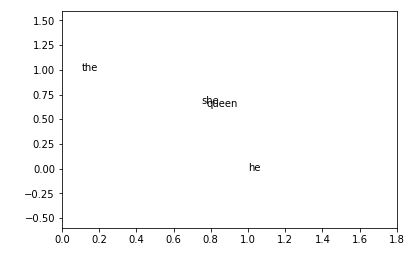

In [38]:
# to plot - we are reducing dimensions of vectors (from 5 to 2)
from sklearn.manifold import TSNE

model = TSNE(n_components=2, random_state=0)
np.set_printoptions(suppress=True)
vectors = model.fit_transform(vectors)

# Then, we need to normalize the results so that we can view them more comfortably in matplotlib
from sklearn import preprocessing

normalizer = preprocessing.Normalizer()
vectors = normalizer.fit_transform(vectors, 'l2')

# Finally, we will plot the 2D normalized vectors
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
for word in words:
    # print(word, vectors[word2int[word]][1])
    ax.annotate(word, (vectors[word2int[word]][0], vectors[word2int[word]][1]))
plt.ylim(-.6, 1.6)
plt.xlim(0., 1.8)
plt.show()
